# Assignment 3- ML – Water Quality Prediction - Random Forest

# Rashi Jadhav PRN : 25063

Description:
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health 
protection. This is important as a health and development issue at a national, regional and local level. In some regions, 
it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions 
in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


### 1. Load the necessary packages

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import joblib
import pickle

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


### 2. Exploring the data

In [26]:
data=pd.read_csv('water_potability.csv')
#data=pd.read_csv('Downloads\Machine Learning\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
#Number of rows and column
print("Number of Rows and Columns : ")
print(data.shape)

Number of Rows and Columns : 
(3276, 10)


In [28]:
#Unique elements in columns
print('      Unique elements in features')
data.nunique()

      Unique elements in features


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [29]:
#Finding duplicate rows
data.duplicated().sum()

0

No duplicated rows were found.

In [30]:
# Target value Features
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

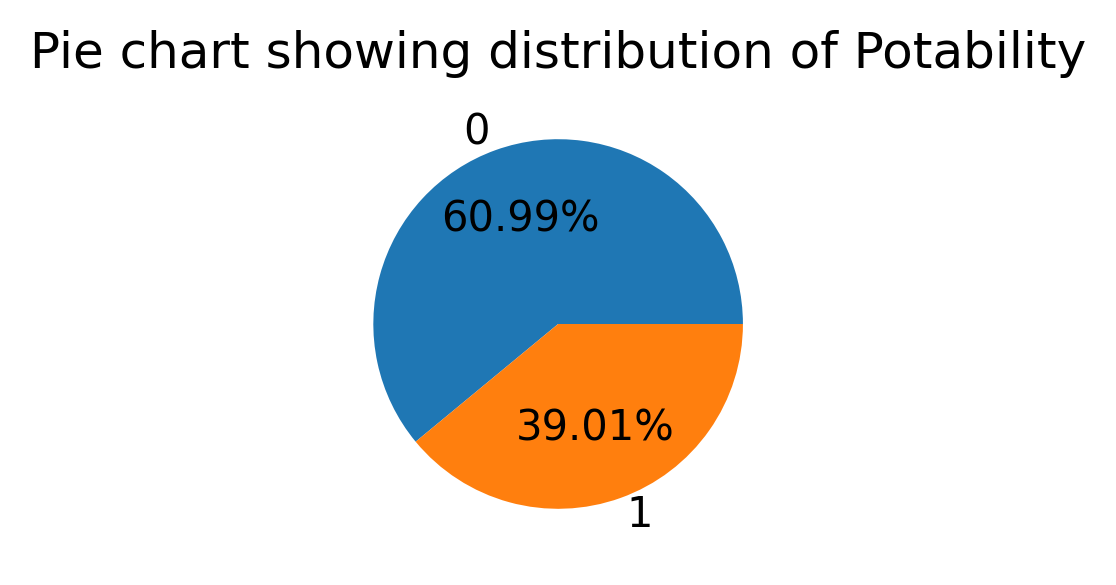

In [31]:
# Pie chart showing Potability Disrtibution

fig=plt.figure(figsize=(2,2), dpi=300, facecolor='w')
potability_p=data['Potability'].value_counts()
plt.pie(potability_p, labels=potability_p.index, autopct="%.2f%%")
plt.title('Pie chart showing distribution of Potability')
plt.savefig('Potability_pie.png', dpi=300, bbox_inches="tight" )
plt.show()

Observation : From the above chart we can see that majority of the water(around 61%) is not safe for human consumption. 

In [32]:
#View statistical properties of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Finding correlation between numeric columns

In [33]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Observation :  
1. There are no variables with a correlation coefficient greater than 0.5 (or less than -0.5), indicating that there are no strong linear 
relationships among the variables in the given dataset.

<AxesSubplot:>

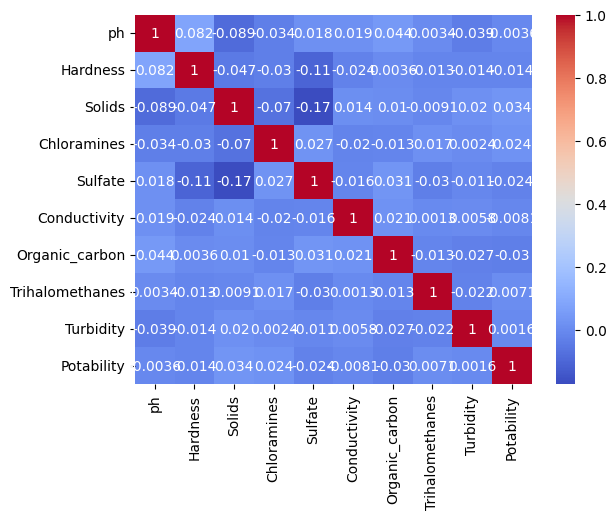

In [34]:
corr=data.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

# Find out if there are any outliers using box plot.

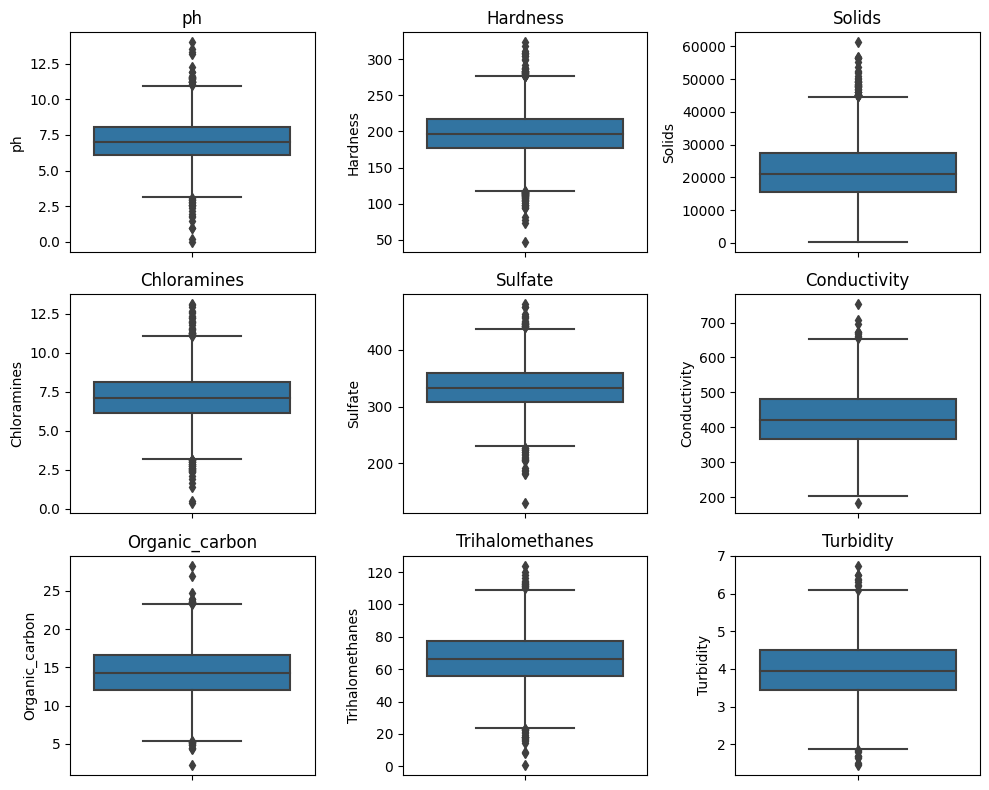

In [35]:
column_name=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
for ax, column_name in zip(axes.flatten(), column_name):
    sns.boxplot(data = data, y = column_name, ax=ax)
    ax.set_title(column_name)
plt.tight_layout()
plt.show()

### Distribution plot

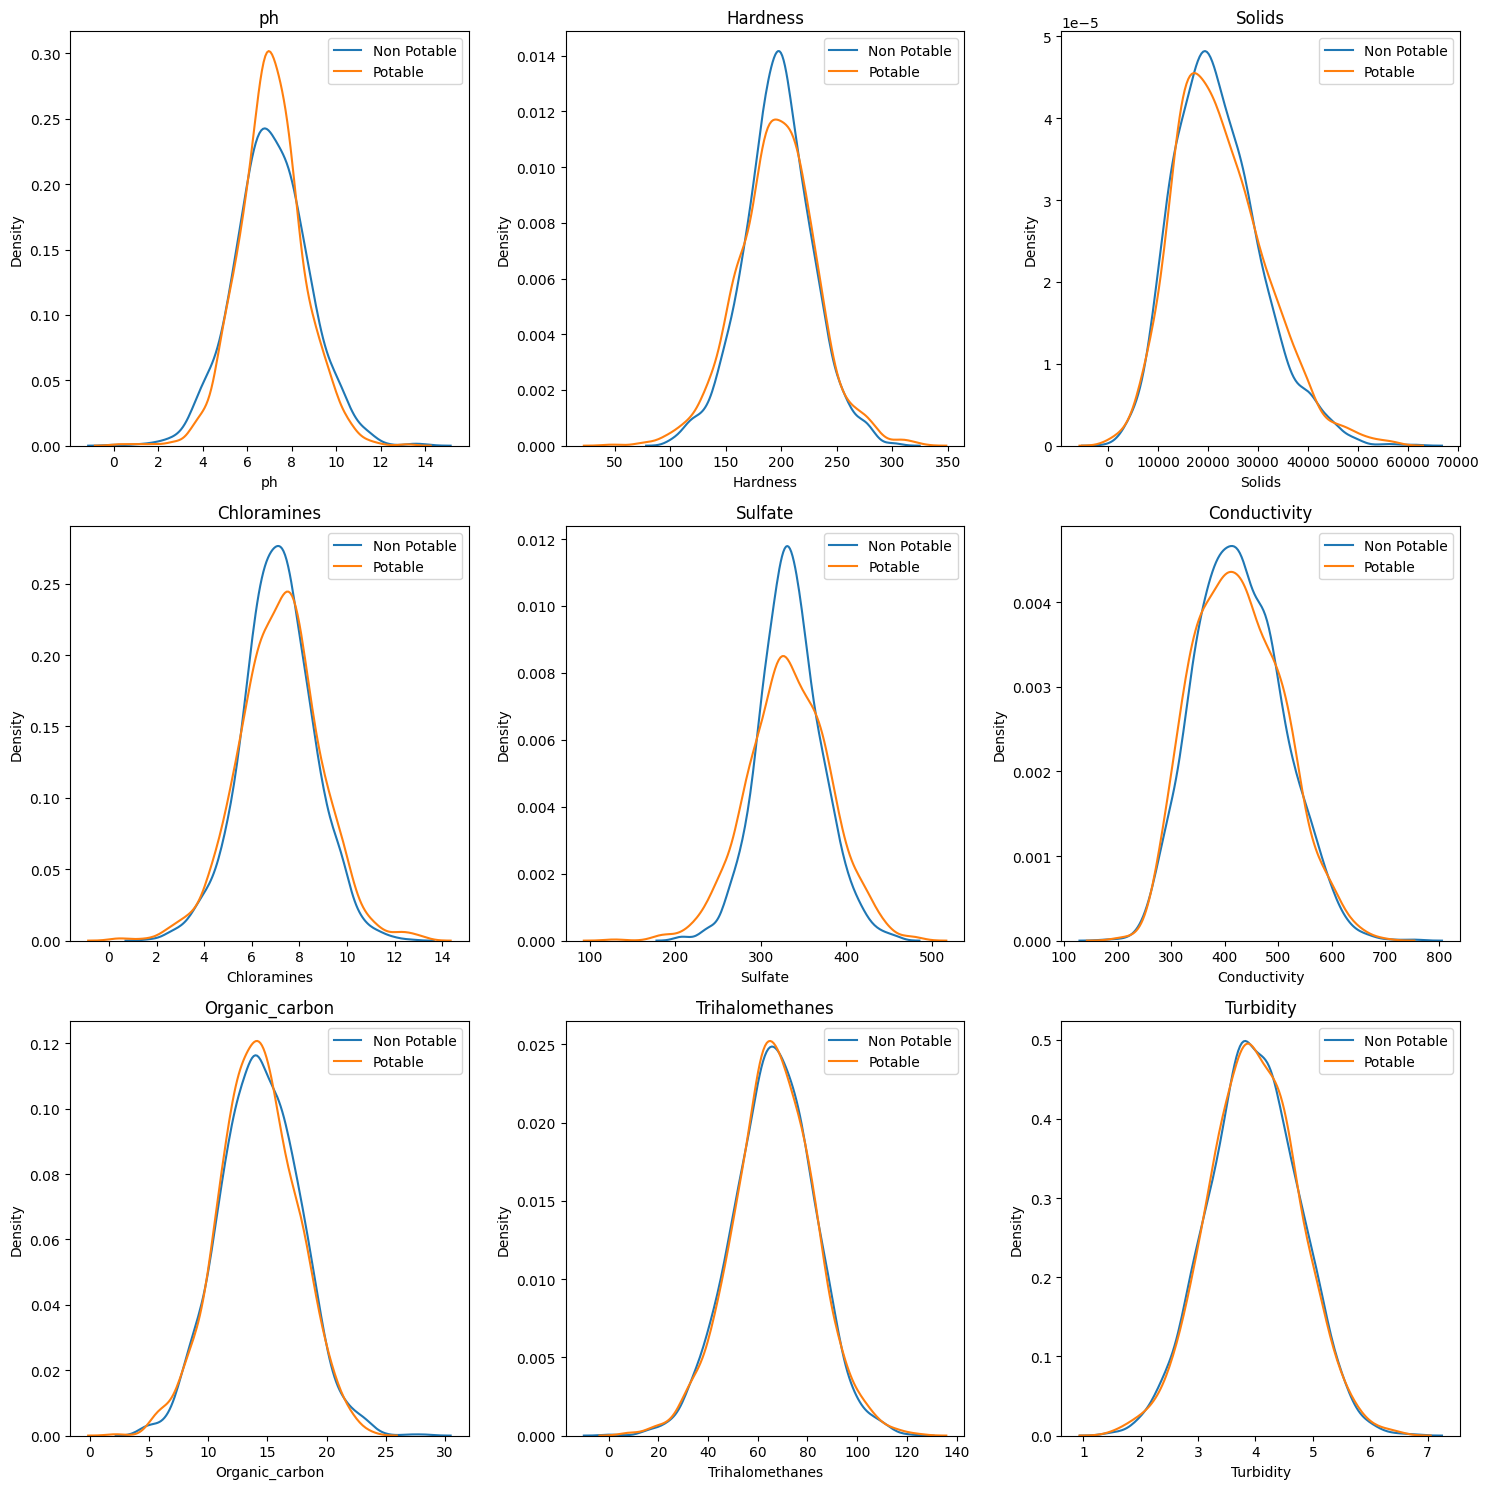

In [36]:
column_name=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(column_name[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

# Finding the missing values : 

In [37]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Findings : 
1. All the columns are numerical.  
2. There are missing values in dataset.  

In [38]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Interpretation :   
We can see that there are missing values in 3 column (ph, Sulphate and Trihalomethanes)

# Filling the missing values : 

In [39]:
# Filling missing values of 3 numerical columns by mean
data['ph'].fillna(float(data['ph'].mean()),inplace=True)
data['Sulfate'].fillna(float(data['Sulfate'].mean()),inplace=True)
data['Trihalomethanes'].fillna(float(data['Trihalomethanes'].mean()),inplace=True)

In [40]:
#checking if all the 3 columns are filled or not
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Performing Normalization on Dataset

In [41]:
x = data.drop('Potability', axis=1)
y = data['Potability']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Random Forest Classifier

In [44]:
# Creating and training A Random Forest Classifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scaled , y_train)

# Making prediction on dataset
y_prediction_rf=model_rf.predict(x_test_scaled)

In [45]:
# Calculating accuracy of Random Forest Classifier
rf_accuracy=accuracy_score(y_test,y_prediction_rf)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_prediction_rf)

# Precision
nb_precision = precision_score(y_test, y_prediction_rf, average='weighted')

# Recall
nb_recall = recall_score(y_test, y_prediction_rf, average='weighted')

# F1-Score
nb_f1_score = f1_score(y_test, y_prediction_rf, average='weighted')

print('Random Forest Classifier Accuracy : ' , rf_accuracy)
print("Confusion Matrix : ",nb_cm)
print("Precision : ",nb_precision)
print("Recall : ",nb_recall)
print("F1-Score : ",nb_f1_score)
print(classification_report(y_prediction_rf, y_test))

Random Forest Classifier Accuracy :  0.698170731707317
Confusion Matrix :  [[372  40]
 [158  86]]
Precision :  0.6946906113265984
Recall :  0.698170731707317
F1-Score :  0.6689455806591118
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       530
           1       0.35      0.68      0.46       126

    accuracy                           0.70       656
   macro avg       0.63      0.69      0.63       656
weighted avg       0.80      0.70      0.73       656



### Random Search

In [46]:
# Define the parameter grid for Random Search
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(x_train_scaled, y_train)

# Access the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print()
print()
# Evaluate the performance of the best model using cross-validation
scores = cross_val_score(best_model, x, y, cv=5)
print("Cross-Validation Scores:", scores)
print()
print(best_model)


Overall Accuracy: 0.6951219512195121
Precision: 0.6900146664818921
Recall: 0.6951219512195121
F1 Score: 0.666398825964924


Cross-Validation Scores: [0.60823171 0.64732824 0.63816794 0.58473282 0.67328244]

RandomForestClassifier(n_estimators=200)


In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)
y_gbc = gbc.predict(x_test_scaled)

accuracy_gbc = accuracy_score(y_test, y_gbc)
precision_gbc = precision_score(y_test, y_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_gbc, average='weighted')
f1_gbc = f1_score(y_test, y_gbc, average='weighted')

print("Gradient Boosting - Overall Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1 Score:", f1_gbc)

Gradient Boosting - Overall Accuracy: 0.6798780487804879
Precision: 0.6801377503061016
Recall: 0.6798780487804879
F1 Score: 0.6334951190173846


# Store the Model

In [48]:
with open('model_water.pkl', 'wb') as file:
    pickle.dump(best_model, file)
